In [ ]:
from datetime import date
from io import BytesIO
from IPython import display
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

In [ ]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
217,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,...,11.48,24.47,75.40,403.7,0.09527,0.13970,0.19250,0.03571,0.2868,0.07809
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
234,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,0.1551,0.06403,...,10.51,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178
207,17.010,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.05390,0.2026,0.05223,...,19.80,25.05,130.00,1210.0,0.11110,0.14860,0.19320,0.10960,0.3275,0.06469


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 239 to 37
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              426 non-null    float64
 1   mean texture             426 non-null    float64
 2   mean perimeter           426 non-null    float64
 3   mean area                426 non-null    float64
 4   mean smoothness          426 non-null    float64
 5   mean compactness         426 non-null    float64
 6   mean concavity           426 non-null    float64
 7   mean concave points      426 non-null    float64
 8   mean symmetry            426 non-null    float64
 9   mean fractal dimension   426 non-null    float64
 10  radius error             426 non-null    float64
 11  texture error            426 non-null    float64
 12  perimeter error          426 non-null    float64
 13  area error               426 non-null    float64
 14  smoothness error         

In [ ]:
X_train['mean concavity'].value_counts()

0.00000    5
0.12040    3
0.10070    2
0.05892    2
0.06726    2
          ..
0.07097    1
0.14500    1
0.01797    1
0.13790    1
0.02562    1
Name: mean concavity, Length: 409, dtype: int64

In [ ]:
y_train.head()

217    1
4      0
63     1
234    1
207    0
dtype: int64

In [ ]:
X_train.describe() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,14.140723,19.116103,92.018779,653.797887,0.096109,0.103270,0.086371,0.048411,0.179832,0.062540,...,16.277754,25.423427,107.315094,877.642723,0.131921,0.250499,0.265300,0.114304,0.287938,0.083364
std,3.416117,4.065320,23.522377,340.822778,0.013812,0.049888,0.076153,0.037761,0.026167,0.006809,...,4.719791,5.770110,32.924775,553.321264,0.022622,0.149443,0.196957,0.063630,0.057023,0.017207
min,6.981000,10.380000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.870000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.840000,16.155000,76.152500,431.925000,0.086102,0.066315,0.029500,0.020685,0.161900,0.057685,...,13.115000,20.992500,84.530000,523.025000,0.115400,0.147325,0.114975,0.065035,0.250425,0.071557
50%,13.375000,18.825000,86.290000,551.400000,0.095450,0.092525,0.060070,0.033420,0.178000,0.061485,...,14.985000,25.265000,97.745000,688.850000,0.131200,0.216850,0.224500,0.099925,0.280750,0.080195
75%,15.780000,21.555000,103.675000,782.675000,0.105300,0.129550,0.122400,0.070582,0.194875,0.065697,...,18.707500,29.157500,124.750000,1060.500000,0.144550,0.321200,0.375225,0.157100,0.315400,0.090715
max,27.420000,39.280000,186.900000,2501.000000,0.163400,0.277600,0.426400,0.191300,0.274300,0.095750,...,36.040000,44.870000,251.200000,4254.000000,0.222600,1.058000,1.105000,0.291000,0.577400,0.207500


In [ ]:
def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

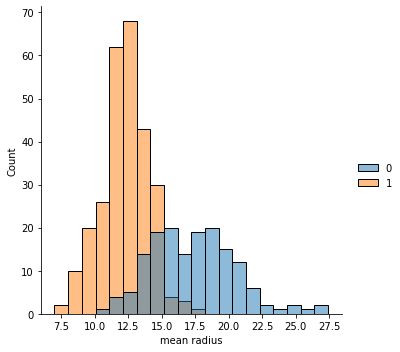

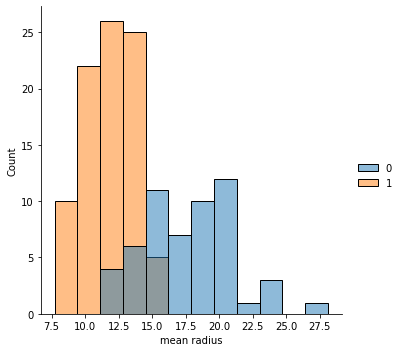

In [ ]:
sns.displot(x=X_train['mean radius'], hue=y_train)
mean_radius_train = plot_to_str()

sns.displot(x=X_test['mean radius'], hue=y_test)
mean_radius_test = plot_to_str()

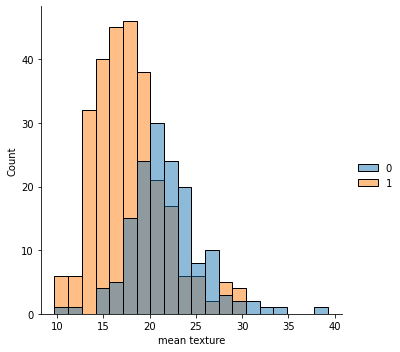

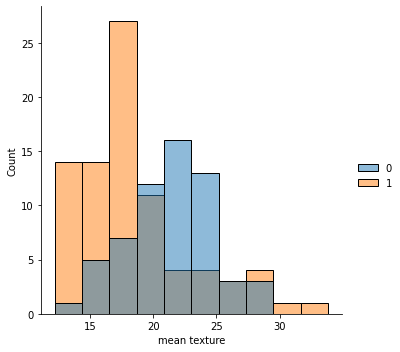

In [ ]:
sns.displot(x=X_train['mean texture'], hue=y_train)
mean_texture_train = plot_to_str()

sns.displot(x=X_test['mean texture'], hue=y_test)
mean_texture_test = plot_to_str()

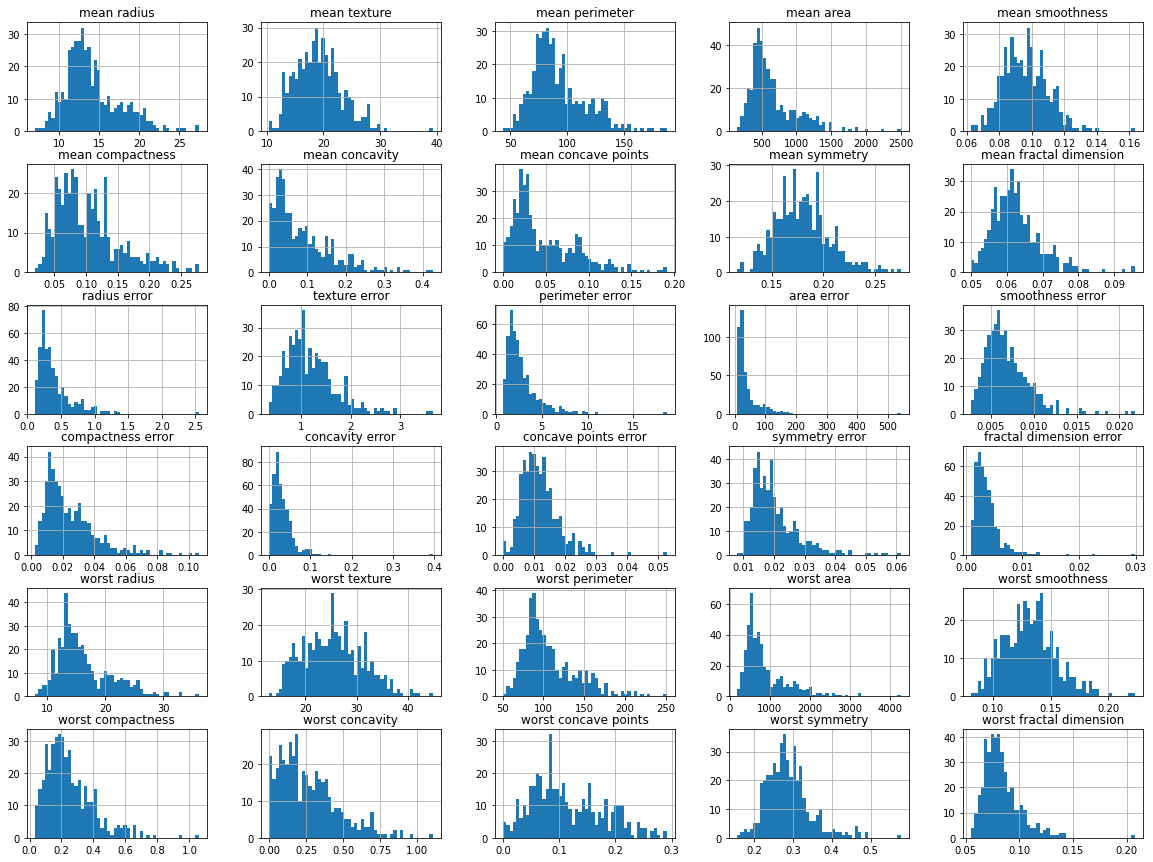

In [ ]:
X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
corr_matrix = X_train.corr()
corr_matrix['mean concavity'].sort_values(ascending=False)

mean concavity             1.000000
mean concave points        0.924137
worst concavity            0.891965
mean compactness           0.874937
worst concave points       0.866281
worst compactness          0.756616
worst perimeter            0.740971
mean perimeter             0.718193
worst radius               0.702729
worst area                 0.702714
mean area                  0.693178
concavity error            0.682482
mean radius                0.679898
concave points error       0.678299
perimeter error            0.673770
compactness error          0.662433
radius error               0.647724
area error                 0.642558
worst fractal dimension    0.510118
mean smoothness            0.480346
fractal dimension error    0.452925
mean symmetry              0.450219
worst smoothness           0.417463
worst symmetry             0.346411
mean fractal dimension     0.295425
worst texture              0.290450
mean texture               0.289725
symmetry error             0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0487ea210>,
      dtype=object)

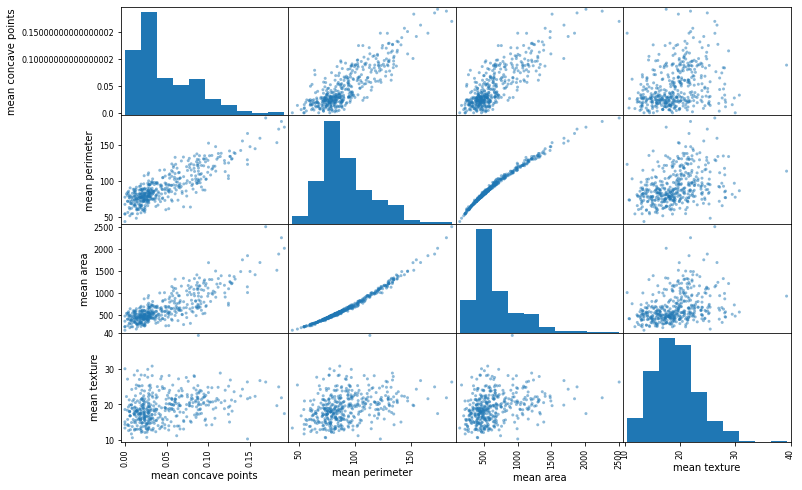

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["mean concave points", "mean perimeter", "mean area",
              "mean texture"]
scatter_matrix(X_train[attributes], figsize=(12, 8))